<a href="https://colab.research.google.com/github/juancas9812/Inteligencia-Artificial-2020-3/blob/master/No_linealizacion_metodos_lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pontificia Universidad Javeriana
#Inteligencia Artificial 2020-30

Tarea: No Linealización de métodos lineales

Juan Camilo Sarmiento Peñuela


Enunciado:

A partir del ejemplo visto en clase para regresión logística:

Use una combinación no lineal de las entradas X1 y X2, para subir la dimensionalidad del vector de catacterísticas, de tal manera que le permita discriminar usando un clasificador lineal por  regresión logística, sobre un dataset no separable linealmente.

Ayuda: use la función descrita en  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

Para crear dos grupos con sus etiquetas que no sean separables linealmente.

Use varias combinaciones para realizar este procedimiento de extención de las características de entrada.

Responda en sus conclusiones:

¿Qué pasa si extiende X usando solo operaciones de suma o escalización de X1 y X2?

cuales operaciones de extención de la dimensionalidad funcionan mejor según su opinión?

##Clasificador por regresión logística

Se realiza el ejemplo dado en clase, utilizando el dataset de la clase y un dataset creado con el método make_circles.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

from scipy.spatial import distance# por favor buscar la documentacion oficial de la función https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance
from sklearn.preprocessing import StandardScaler# por favor buscar la documentacion oficial de la función
#https://scikit-learn.org/stable/modules/preprocessing.html
%matplotlib inline
#https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
from sklearn.datasets import make_blobs
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
from sklearn.datasets import make_circles

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

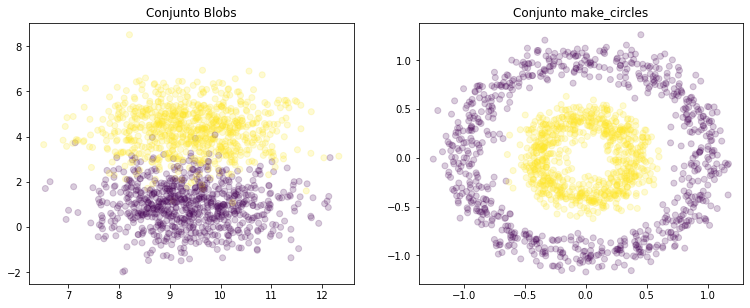

In [94]:
Xtotal, ytotal = make_blobs(n_samples = 1500, centers = 2, n_features=2, shuffle=True, random_state=4)#4 y 30 da un buen cluster para probar
Xtotal2, ytotal2 = make_circles(n_samples=1500, shuffle=True, noise=0.1, random_state=4, factor=0.4)

"""
plt.figure()
plt.scatter(Xtotal[:,0],Xtotal[:,1],c=ytotal,alpha=0.2)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

plt.figure()
plt.scatter(Xtotal2[:,0],Xtotal2[:,1],c=ytotal2,alpha=0.2)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()
"""

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=[12.8, 4.8])
ax1.scatter(Xtotal[:,0],Xtotal[:,1],c=ytotal,alpha=0.2)
ax1.set_title('Conjunto Blobs')
ax2.scatter(Xtotal2[:,0],Xtotal2[:,1],c=ytotal2,alpha=0.2)
ax2.set_title('Conjunto make_circles')
fig.show()


In [87]:
X_train, X_test, y_train, y_test = train_test_split(Xtotal, ytotal, random_state=0)
scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xtotal2, ytotal2, random_state=0)
scaler2 = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler2.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train2 = scaler2.transform(X_train2)
X_test2 = scaler2.transform(X_test2)

In [35]:
# ver https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

LR = LogisticRegression(penalty='l2', C=0.01,random_state=0)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

LR.fit(X_train, y_train)

LR2 = LogisticRegression(penalty='l2',C=0.01,random_state=0)
LR2.fit(X_train2,y_train2)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

MCC(blobs): 0.8987170342729172
Acc(blobs) 0.9493333333333334
MCC(circles) -0.24147959934275065
Acc(circles) 0.37866666666666665


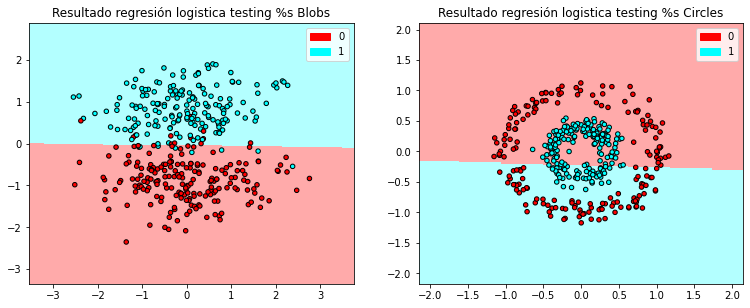

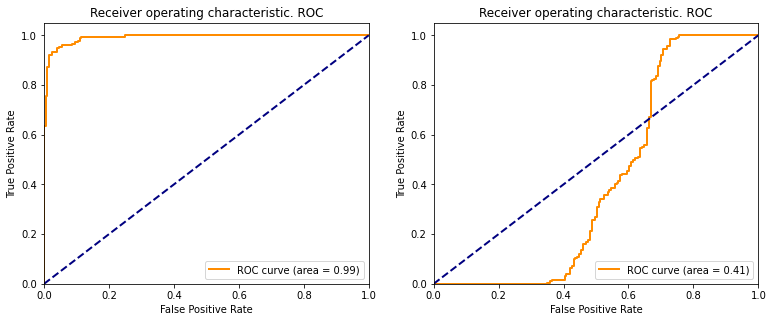

In [36]:
X=X_test
y=y_test

X2=X_test2
y2=y_test2

h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

x_min2, x_max2 = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min2, y_max2 = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min2, x_max2, h),np.arange(y_min2, y_max2, h))
Z2 = LR2.predict(np.c_[xx2.ravel(), yy2.ravel()])



 
# Put the result into a color plot

Z = Z.reshape(xx.shape)
Z2 = Z2.reshape(xx2.shape)

#plt.figure()
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
"""
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
plt.legend(handles=[patch0, patch1])  
plt.title("Resultado regresión logistica testing %s")
plt.show()
"""

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=[12.8, 4.8])
ax1.pcolormesh(xx,yy,Z,cmap=cmap_light)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
patch0 = mpatches.Patch(color='#FF0000', label='0')
patch1 = mpatches.Patch(color='#00ffff', label='1')
ax1.legend(handles=[patch0, patch1])  
ax1.set_title("Resultado regresión logistica testing %s Blobs")

ax2.pcolormesh(xx2,yy2,Z2,cmap=cmap_light)
ax2.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=cmap_bold, edgecolor='k', s=20)
ax2.set_xlim(xx2.min(), xx2.max())
ax2.set_ylim(yy2.min(), yy2.max())
ax2.legend(handles=[patch0, patch1])  
ax2.set_title("Resultado regresión logistica testing %s Circles")


from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

y_test_predicted = LR.predict(X_test)
y_test_scores = LR.predict_proba(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("MCC(blobs):", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Acc(blobs)", ACC)
"""
print(y_test_scores[:,1])
print(y_test_predicted)
"""
y_test_predicted2 = LR2.predict(X_test2)
y_test_scores2 = LR2.predict_proba(X_test2)
MCC2 = matthews_corrcoef(y_test2, y_test_predicted2)
print("MCC(circles)", MCC2)
ACC2 = accuracy_score(y_test2, y_test_predicted2)
print("Acc(circles)", ACC2)


fpr,tpr,thresholds = roc_curve(y_test, y_test_scores[:,1])
roc_auc=roc_auc_score(y_test, y_test_scores[:,1])
lw=2
"""
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()
"""
fpr2,tpr2,thresholds2 = roc_curve(y_test2, y_test_scores2[:,1])
roc_auc2=roc_auc_score(y_test2, y_test_scores2[:,1])

fig, (ax1,ax2) = plt.subplots(1, 2,figsize=[12.8, 4.8])

ax1.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver operating characteristic. ROC')
ax1.legend(loc="lower right")

ax2.plot(fpr2, tpr2, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
ax2.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic. ROC')
ax2.legend(loc="lower right")



Como se puede observar, el conjunto de datos es no lineal y se obtienen problemas al intentar clasificar. Al aumentar la dimensión del vector de características, se obtiene:

In [95]:
X1sq=np.square(Xtotal2[:,0])
X2sq=np.square(Xtotal2[:,1])
X1X2=np.multiply(Xtotal2[:,0],Xtotal2[:,1])
Xtotal2=np.insert(Xtotal2 , -1, X1sq,axis=1)
Xtotal2=np.insert(Xtotal2 , -1, X2sq,axis=1)
Xtotal2=np.insert(Xtotal2 , -1, X1X2,axis=1)

In [54]:
Xtotal2.shape

(1500, 5)

In [55]:
print(Xtotal2[0:5,:])

[[ 5.06479422e-02  2.56521405e-03  2.08378769e-01  2.31200377e-02
   4.56485234e-01]
 [ 2.39008779e-01  5.71251964e-02  9.14463081e-01 -2.28558271e-01
  -9.56275630e-01]
 [ 5.22826308e-01  2.73347349e-01  5.43560034e-02 -1.21893681e-01
  -2.33143740e-01]
 [ 2.72562316e-01  7.42902162e-02  5.86119928e-04 -6.59871019e-03
  -2.42099138e-02]
 [ 2.61020841e-01  6.81318795e-02  8.77954386e-01 -2.44574492e-01
  -9.36992201e-01]]


In [96]:
X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(Xtotal2, ytotal2, random_state=0)
scaler = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler.fit(X_train_fin)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train_fin = scaler.transform(X_train_fin)
X_test_fin = scaler.transform(X_test_fin)

LR_fin = LogisticRegression(penalty='l2', C=0.01,random_state=0)
LR_fin.fit(X_train_fin, y_train_fin)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

MCC: 0.9946734467242802
Accuracy: 0.9973333333333333


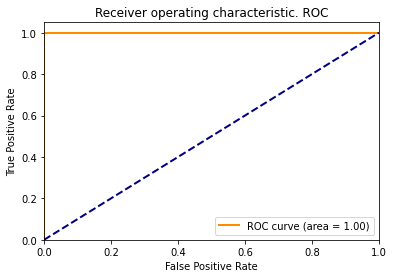

In [97]:
X=X_test_fin
y=y_test_fin
h = .02  # step size in the mesh
"""
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
"""
# Z= LR_fin.predict(np.c_[xx.ravel(), yy.ravel()])

#Z = Z.reshape(xx.shape)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#patch0 = mpatches.Patch(color='#FF0000', label='0')
#patch1 = mpatches.Patch(color='#00ffff', label='1')
#plt.legend(handles=[patch0, patch1])  
#plt.title("Resultado %s")
#plt.show()


y_test_predicted_fin = LR_fin.predict(X_test_fin)
y_test_scores_fin = LR_fin.predict_proba(X_test_fin)
MCC = matthews_corrcoef(y_test_fin, y_test_predicted_fin)
print("MCC:", MCC)
ACC = accuracy_score(y_test_fin, y_test_predicted_fin)
print("Accuracy:", ACC)

fpr,tpr,thresholds = roc_curve(y_test_fin, y_test_scores_fin[:,1])
roc_auc=roc_auc_score(y_test_fin, y_test_scores_fin[:,1])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

Como se puede observar, al aumentar la dimensión de las características de manera no lineal, de forma tal que estas son ahora [X1,X2,X1^2,X2^2,X1*X2], se logra realizar una buena clasificación con un acierto del 99.73%.

Si se intentara realizar el amuento de la dimensión con transformaciones lineales como 3*X1 o X1+X2, seguirá dando un acierto bajo, con un coeficiente de correlación de Mathews cercano a 0, como se muestra a continuación.

In [99]:
X_lin,y_lin=make_circles(n_samples=1500, shuffle=True, noise=0.1, random_state=4, factor=0.4)
X1times3=3*X_lin[:,0]
X2plusX1=X_lin[:,0]+X_lin[:,1]
X_lin=np.insert(X_lin,-1,X1times3,axis=1)
X_lin=np.insert(X_lin,-1,X2plusX1,axis=1)

In [100]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_lin, y_lin, random_state=0)
scaler3 = StandardScaler()# Ejercicio, no use la escalización de los datos a ver que tal funciona!
scaler3.fit(X_train3)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train3 = scaler3.transform(X_train3)
X_test3 = scaler3.transform(X_test3)

LR3 = LogisticRegression(penalty='l2', C=0.01,random_state=0)
LR3.fit(X_train3, y_train3)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

MCC: -0.1810755636472217
Accuracy: 0.408


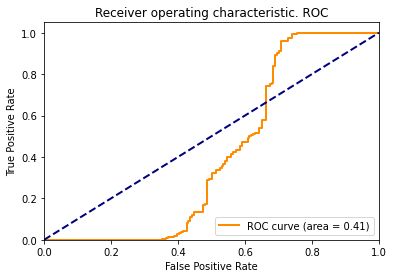

In [101]:
X=X_test3
y=y_test3
h = .02  # step size in the mesh
"""
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#b3ffff'])#['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2']
cmap_bold = ListedColormap(['#FF0000', '#00ffff'])#['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00']
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
"""
# Z= LR_fin.predict(np.c_[xx.ravel(), yy.ravel()])

#Z = Z.reshape(xx.shape)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#patch0 = mpatches.Patch(color='#FF0000', label='0')
#patch1 = mpatches.Patch(color='#00ffff', label='1')
#plt.legend(handles=[patch0, patch1])  
#plt.title("Resultado %s")
#plt.show()

y_test_predicted3 = LR3.predict(X_test3)
y_test_scores3 = LR3.predict_proba(X_test3)
MCC = matthews_corrcoef(y_test3, y_test_predicted3)
print("MCC:", MCC)
ACC = accuracy_score(y_test3, y_test_predicted3)
print("Accuracy:", ACC)

fpr,tpr,thresholds = roc_curve(y_test3, y_test_scores3[:,1])
roc_auc=roc_auc_score(y_test3, y_test_scores3[:,1])

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic. ROC')
plt.legend(loc="lower right")
plt.show()

##Conclusiones

Se concluye que a partir de incrementar la dimensión de las características de los datos de manera no lineal, se obtiene una clasificación de alto desempeño que obtiene un accuracy del 99.7%.

A partir de los resultados, las mejores operaciones son las que se realizan entre las caracteristicas, como la multiplicación de una columna por esta misma o por otras, y operaciones con exponenciales. Dado que existe la posibilidad de que una de las características sea 0, no sería posible realizar la operación logarítmo o división.

Teóricamente, dado que se están utilizando datos que describen regiones circulares, se podría tomar la desición de clasificación usando los cuadrados de las 2 caracteristicas originales -1. Sin embargo, con el resultado encontrado, se podría concluir que solo con elevar el grado del vector de características de manera no lineal, se puede obtener un buen resultado de clasificación.
